In [57]:

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns

In [58]:
# Load the data
Bitcoin_df = pd.read_csv('coin_Bitcoin.csv')

In [59]:
# We start analysing Bitcoin. 
#Display the head of the training dataset
Bitcoin_df.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


In [60]:
# Apllying sort function to make sure that the data is sorted by date.
Bitcoin_df = Bitcoin_df.sort_values("Date")

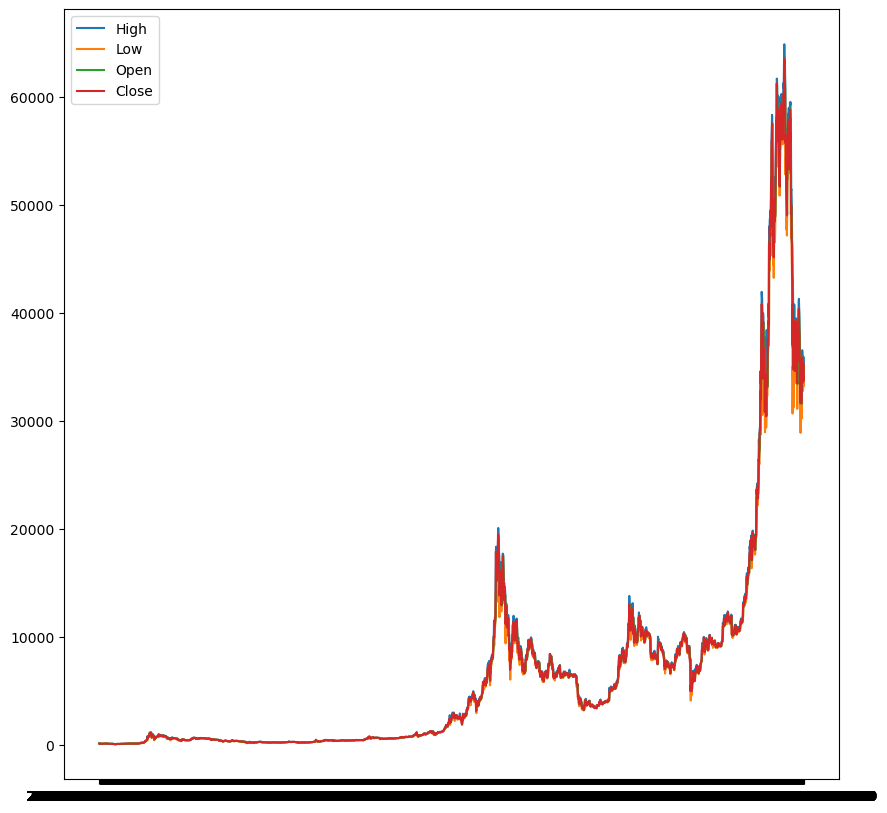

In [61]:
#Visualize evolution of the price over the time
plt.figure(figsize=(10,10))
plt.plot(Bitcoin_df['Date'], Bitcoin_df['High'], label='High')
plt.plot(Bitcoin_df['Date'], Bitcoin_df['Low'], label='Low')
plt.plot(Bitcoin_df['Date'], Bitcoin_df['Open'], label='Open')
plt.plot(Bitcoin_df['Date'], Bitcoin_df['Close'], label='Close')

plt.legend()
plt.show()

In [62]:
#The SNo,volume,name and symbol columns are dropped as they doesnt provide any usefull information
#The Close value is dropped as it will be the y value
X = Bitcoin_df.drop(['SNo','Date','Name','Volume','Symbol','Close','Marketcap'], axis = 1)

In [63]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['High', 'Low', 'Open', 'Close']])


In [64]:
# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
test_size = len(df_scaled) - train_size
train_data, test_data = df_scaled[0:train_size, :], df_scaled[train_size:len(df_scaled), :]

In [65]:
# Define the function to create the input and output sequences
def create_sequences(dataset, seq_length):
    data_X, data_y = [], []
    for i in range(len(dataset)-seq_length-1):
        a = dataset[i:(i+seq_length), :]
        data_X.append(a)
        data_y.append(dataset[i + seq_length, 3])
    return np.array(data_X), np.array(data_y)


In [66]:
# Set the sequence length
seq_length = 30

In [67]:
# Create the input and output sequences
train_X, train_y = create_sequences(train_data, seq_length)
test_X, test_y = create_sequences(test_data, seq_length)


In [68]:
# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [69]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [70]:
# Train the model
epochs_hist=model.fit(train_X, train_y, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/100
34/34 [==============================] - 22s 250ms/step - loss: 5.8752e-04 - val_loss: 1.9585e-04
Epoch 2/100
34/34 [==============================] - 3s 85ms/step - loss: 1.5817e-04 - val_loss: 1.8469e-04
Epoch 3/100
34/34 [==============================] - 3s 86ms/step - loss: 1.4349e-04 - val_loss: 2.0138e-04
Epoch 4/100
34/34 [==============================] - 3s 93ms/step - loss: 1.1213e-04 - val_loss: 2.8492e-04
Epoch 5/100
34/34 [==============================] - 3s 77ms/step - loss: 1.1615e-04 - val_loss: 1.6172e-04
Epoch 6/100
34/34 [==============================] - 3s 76ms/step - loss: 1.2790e-04 - val_loss: 2.6889e-04
Epoch 7/100
34/34 [==============================] - 3s 83ms/step - loss: 1.0475e-04 - val_loss: 1.4470e-04
Epoch 8/100
34/34 [==============================] - 3s 76ms/step - loss: 1.1396e-04 - val_loss: 2.5288e-04
Epoch 9/100
34/34 [==============================] - 3s 80ms/step - loss: 1.1577e-04 - val_loss: 1.6010e-04
Epoch 10/100
34/34 [======

34/34 [==============================] - 3s 85ms/step - loss: 5.0528e-05 - val_loss: 1.6860e-04
Epoch 77/100
34/34 [==============================] - 3s 85ms/step - loss: 5.0807e-05 - val_loss: 6.6351e-05
Epoch 78/100
34/34 [==============================] - 3s 85ms/step - loss: 4.6316e-05 - val_loss: 5.3790e-05
Epoch 79/100
34/34 [==============================] - 3s 84ms/step - loss: 6.4394e-05 - val_loss: 7.2909e-05
Epoch 80/100
34/34 [==============================] - 3s 82ms/step - loss: 6.2266e-05 - val_loss: 1.5437e-04
Epoch 81/100
34/34 [==============================] - 3s 83ms/step - loss: 4.7876e-05 - val_loss: 5.6331e-05
Epoch 82/100
34/34 [==============================] - 3s 83ms/step - loss: 5.2264e-05 - val_loss: 5.0625e-05
Epoch 83/100
34/34 [==============================] - 3s 88ms/step - loss: 4.4244e-05 - val_loss: 6.2879e-05
Epoch 84/100
34/34 [==============================] - 3s 84ms/step - loss: 4.7747e-05 - val_loss: 5.7042e-05
Epoch 85/100
34/34 [============

In [71]:
# Evaluate the model
train_score = model.evaluate(train_X, train_y, verbose=0)
print('Train loss:', train_score)
test_score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', test_score)

Train loss: 3.223434032406658e-05
Test loss: 0.001957512693479657


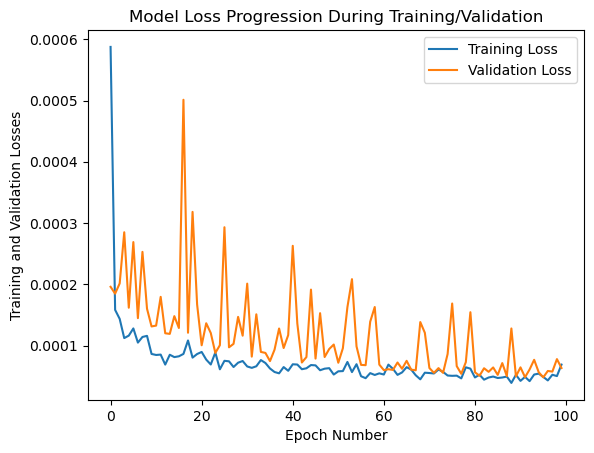

In [72]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [73]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

18/18 [==============================] - 0s 20ms/step


In [76]:
# Reshape train_predict array
train_predict = train_predict.reshape(-1, 1)

# Reshape test_predict array
test_predict = test_predict.reshape(-1, 1)

# Concatenate train_X[:,:,0] and train_predict arrays
train_data = np.concatenate((train_X[:,:,0], train_predict), axis=1)

# Concatenate test_X[:,:,0] and test_predict arrays
test_data = np.concatenate((test_X[:,:,0], test_predict), axis=1)

# Concatenate train_X[:,:,0] and train_y arrays
train_labels = np.concatenate((train_X[:,:,0], train_y.reshape(-1,1)), axis=1)

# Concatenate test_X[:,:,0] and test_y arrays
test_labels = np.concatenate((test_X[:,:,0], test_y.reshape(-1,1)), axis=1)



In [77]:
# Inverse the scaling of the predictions
train_predict = scaler.inverse_transform(train_data)[:, -1]
test_predict = scaler.inverse_transform(test_data)[:, -1]
train_y = scaler.inverse_transform(train_labels)[:, -1]
test_y = scaler.inverse_transform(test_labels)[:, -1]


ValueError: operands could not be broadcast together with shapes (2361,31) (4,) (2361,31) 